In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import PIL

import torch
import torchvision.models.vgg as models
import torchvision.transforms as transforms

Imagenet standard normalization (substract the mean value and divide by the standard deviation for each channel).

In [2]:
normalize = transforms.Normalize(
    mean = [0.485, 0.456, 0.406],
    std  = [0.229, 0.224, 0.225]
)

Now let's open the image and visualize it.

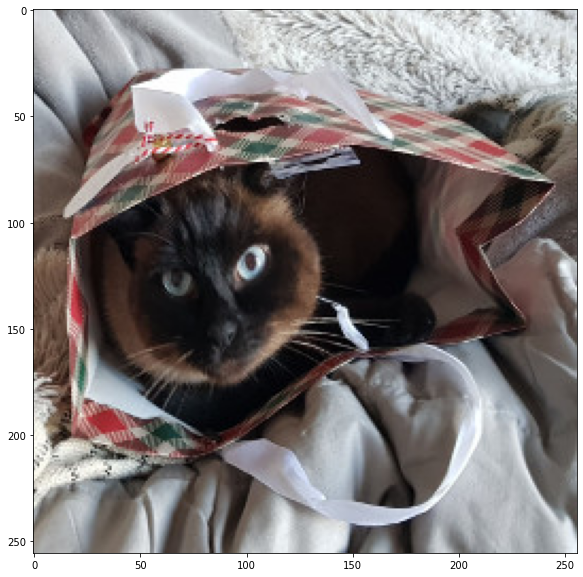

In [3]:
plt.figure(figsize = (10, 10))
img = np.array(PIL.Image.open('../data/raw/cat.jpg').resize((256, 256)))
plt.imshow(img)

PyTorch VGG16 network expects the data in the form `[channel, width, height]` so let's reshape our array.

In [4]:
img = np.transpose(img, (2,0,1))
img.shape

(3, 256, 256)

Let's create our input tensor, normalize it and add a batch dimension (necessary for PyTorch models).

In [5]:
input = torch.tensor(img, dtype = torch.float32)
input = normalize(input)
input = input.unsqueeze(0)
print(input.shape)

torch.Size([1, 3, 256, 256])


Let's load the pretrained model from `torchvision`.

In [6]:
vgg16 = models.vgg16(pretrained = True)

Run only the first 3 convolution layers of the VGG network.

In [7]:
output = vgg16.features[:3](input)
print(output.shape)

torch.Size([1, 64, 256, 256])


In [8]:
print(output)

tensor([[[[-7.6203e+02, -1.2848e+03, -1.9026e+03,  ..., -1.8415e+03,
           -3.2096e+03, -2.0469e+03],
          [ 1.5590e+03,  2.2610e+03,  7.6482e+02,  ...,  9.5845e+02,
           -1.7275e+03, -1.3053e+03],
          [ 1.1797e+03,  1.9437e+03, -1.9493e+01,  ...,  4.5680e+02,
           -2.4961e+03, -1.4265e+03],
          ...,
          [ 8.6793e+02,  1.4961e+03,  1.7570e+02,  ...,  3.0783e+02,
           -3.3785e+03, -2.1516e+03],
          [ 8.7100e+02,  1.5886e+03,  4.0958e+02,  ...,  5.3147e+02,
           -2.8218e+03, -1.7106e+03],
          [ 6.4724e+02,  1.3421e+03,  2.9267e+02,  ...,  3.5029e+02,
           -2.0290e+03, -9.3025e+02]],

         [[ 6.6967e+02,  6.3355e+02,  4.6677e+02,  ...,  5.2298e+02,
            1.1959e+03, -1.8379e+03],
          [ 7.1012e+02,  4.1945e+02,  4.3851e+02,  ...,  6.0320e+02,
            2.1053e+03, -2.6384e+03],
          [-3.2517e+02, -5.8468e+02, -5.6007e+02,  ..., -4.2108e+02,
            1.4490e+03, -3.0121e+03],
          ...,
     

Now let's flatten the representation for future computations.

In [9]:
representation = output.view(-1)
print(representation.shape)
print(representation[:20])

torch.Size([4194304])
tensor([ -762.0290, -1284.7643, -1902.6327, -1880.1992, -1891.4781, -1897.0479,
        -1889.2263, -2128.7646, -2704.6235, -3105.3508, -2500.3657, -1660.7070,
         -967.0995,  -685.8533,  -804.8967,  -917.7391, -1069.8231, -1130.9463,
        -1186.3461, -1256.6388], grad_fn=<SliceBackward>)
